In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *
import matplotlib.pyplot as plt
# import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
import os
os.environ['PYSPARK_PYTHON']='python'

In [3]:
spark = SparkSession.builder.appName("Titanic").getOrCreate()

In [4]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

In [5]:
titanic_pd = pd.read_csv(url)
titanic_df = spark.createDataFrame(titanic_pd)
titanic_df.show(5)

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25|  NaN|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925|  NaN|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05|  NaN|       S|
+-----------+--------+------+--------------------+------+----+-----+-----+------

In [6]:
titanic_df.printSchema() # shows the data types of columns

root
 |-- PassengerId: long (nullable = true)
 |-- Survived: long (nullable = true)
 |-- Pclass: long (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- SibSp: long (nullable = true)
 |-- Parch: long (nullable = true)
 |-- Ticket: string (nullable = true)
 |-- Fare: double (nullable = true)
 |-- Cabin: string (nullable = true)
 |-- Embarked: string (nullable = true)



In [7]:
titanic_df.count() # number of rows

891

In [8]:
len(titanic_df.columns) #number of columns

12

In [9]:
titanic_clean = titanic_df.select(
    'Survived',
    'Pclass',
    'Name',
    col('Sex').alias('Gender'),
    'Age',
    'Fare')


In [10]:
titanic_clean.describe().show()

+-------+------------------+-----------------+--------------------+------+----+------------------+
|summary|          Survived|           Pclass|                Name|Gender| Age|              Fare|
+-------+------------------+-----------------+--------------------+------+----+------------------+
|  count|               891|              891|                 891|   891| 891|               891|
|   mean|0.3838383838383838|2.308641975308642|                NULL|  NULL| NaN|32.204207968574636|
| stddev|0.4865924542648574|0.836071240977049|                NULL|  NULL| NaN| 49.69342859718088|
|    min|                 0|                1| Abbing, Mr. Anthony|female|0.42|               0.0|
|    max|                 1|                3|van Melkebeke, Mr...|  male| NaN|          512.3292|
+-------+------------------+-----------------+--------------------+------+----+------------------+



In [11]:
titanic_clean1 = titanic_clean.withColumn('Survived', 
                                          when(col('Survived')==0, 'No').otherwise('yes'))
titanic_clean1.show()

+--------+------+--------------------+------+----+-------+
|Survived|Pclass|                Name|Gender| Age|   Fare|
+--------+------+--------------------+------+----+-------+
|      No|     3|Braund, Mr. Owen ...|  male|22.0|   7.25|
|     yes|     1|Cumings, Mrs. Joh...|female|38.0|71.2833|
|     yes|     3|Heikkinen, Miss. ...|female|26.0|  7.925|
|     yes|     1|Futrelle, Mrs. Ja...|female|35.0|   53.1|
|      No|     3|Allen, Mr. Willia...|  male|35.0|   8.05|
|      No|     3|    Moran, Mr. James|  male| NaN| 8.4583|
|      No|     1|McCarthy, Mr. Tim...|  male|54.0|51.8625|
|      No|     3|Palsson, Master. ...|  male| 2.0| 21.075|
|     yes|     3|Johnson, Mrs. Osc...|female|27.0|11.1333|
|     yes|     2|Nasser, Mrs. Nich...|female|14.0|30.0708|
|     yes|     3|Sandstrom, Miss. ...|female| 4.0|   16.7|
|     yes|     1|Bonnell, Miss. El...|female|58.0|  26.55|
|      No|     3|Saundercock, Mr. ...|  male|20.0|   8.05|
|      No|     3|Andersson, Mr. An...|  male|39.0| 31.27

In [12]:
titanic_clean1 = titanic_clean1.withColumn('Pclass',
                                          when(col('Pclass')==1,'First').
                                          when(col('Pclass')==2,'Second').otherwise('Third'))

In [13]:
titanic_clean1.show()

+--------+------+--------------------+------+----+-------+
|Survived|Pclass|                Name|Gender| Age|   Fare|
+--------+------+--------------------+------+----+-------+
|      No| Third|Braund, Mr. Owen ...|  male|22.0|   7.25|
|     yes| First|Cumings, Mrs. Joh...|female|38.0|71.2833|
|     yes| Third|Heikkinen, Miss. ...|female|26.0|  7.925|
|     yes| First|Futrelle, Mrs. Ja...|female|35.0|   53.1|
|      No| Third|Allen, Mr. Willia...|  male|35.0|   8.05|
|      No| Third|    Moran, Mr. James|  male| NaN| 8.4583|
|      No| First|McCarthy, Mr. Tim...|  male|54.0|51.8625|
|      No| Third|Palsson, Master. ...|  male| 2.0| 21.075|
|     yes| Third|Johnson, Mrs. Osc...|female|27.0|11.1333|
|     yes|Second|Nasser, Mrs. Nich...|female|14.0|30.0708|
|     yes| Third|Sandstrom, Miss. ...|female| 4.0|   16.7|
|     yes| First|Bonnell, Miss. El...|female|58.0|  26.55|
|      No| Third|Saundercock, Mr. ...|  male|20.0|   8.05|
|      No| Third|Andersson, Mr. An...|  male|39.0| 31.27

In [14]:
titanic_clean1.printSchema()

root
 |-- Survived: string (nullable = false)
 |-- Pclass: string (nullable = false)
 |-- Name: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- Fare: double (nullable = true)



In [15]:
titanic_clean1.describe().show()

+-------+--------+------+--------------------+------+----+------------------+
|summary|Survived|Pclass|                Name|Gender| Age|              Fare|
+-------+--------+------+--------------------+------+----+------------------+
|  count|     891|   891|                 891|   891| 891|               891|
|   mean|    NULL|  NULL|                NULL|  NULL| NaN|32.204207968574636|
| stddev|    NULL|  NULL|                NULL|  NULL| NaN| 49.69342859718088|
|    min|      No| First| Abbing, Mr. Anthony|female|0.42|               0.0|
|    max|     yes| Third|van Melkebeke, Mr...|  male| NaN|          512.3292|
+-------+--------+------+--------------------+------+----+------------------+



In [16]:
# you can use pandas for thisone , however you should convert the spark dataFrame to pandas dataframe
titanic_clean_pd = titanic_clean.toPandas()
titanic_clean_pd.head()

,Survived,Pclass,Name,Gender,Age,Fare
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500


In [17]:
titanic_clean_pd['Survived']=titanic_clean_pd['Survived'].map({0:'No', 1:'yes'})
titanic_clean_pd['Pclass']=titanic_clean_pd['Pclass'].map({1:'First',2:'Second',3:'Third'})
titanic_clean_pd.head()

,Survived,Pclass,Name,Gender,Age,Fare
0,No,Third,"Braund, Mr. Owen Harris",male,22.0,7.2500
1,yes,First,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833
2,yes,Third,"Heikkinen, Miss. Laina",female,26.0,7.9250
3,yes,First,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000
4,No,Third,"Allen, Mr. William Henry",male,35.0,8.0500


In [18]:
titanic_clean_pd.dtypes

Survived     object
Pclass       object
Name         object
Gender       object
Age         float64
Fare        float64
dtype: object

In [19]:
titanic_clean_pd.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [20]:
# count cummaries for categorical variables
titanic_clean1.groupBy('Survived').count().orderBy('Survived').show()

+--------+-----+
|Survived|count|
+--------+-----+
|      No|  549|
|     yes|  342|
+--------+-----+



In [21]:
# count class
titanic_clean1.groupBy('Pclass').count().orderBy('Pclass').show()
# count gender
titanic_clean1.groupBy('Gender').count().orderBy('Gender').show()

+------+-----+
|Pclass|count|
+------+-----+
| First|  216|
|Second|  184|
| Third|  491|
+------+-----+

+------+-----+
|Gender|count|
+------+-----+
|female|  314|
|  male|  577|
+------+-----+



In [22]:
# using spark check for null values in oru collumns
missing_counts = titanic_clean1.select([
    count(when(isnull(c) | isnan(c), c)).alias(c)
    for c in ['Age','Fare', 'Survived', 'Pclass', 'Gender']
])

In [23]:
missing_counts.show()

{"ts": "2025-12-09 11:13:24.411", "level": "ERROR", "logger": "DataFrameQueryContextLogger", "msg": "[CAST_INVALID_INPUT] The value 'No' of the type \"STRING\" cannot be cast to \"DOUBLE\" because it is malformed. Correct the value as per the syntax, or change its target type. Use `try_cast` to tolerate malformed input and return NULL instead. SQLSTATE: 22018", "context": {"file": "java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)", "line": "", "fragment": "isnan", "errorClass": "CAST_INVALID_INPUT"}, "exception": {"class": "Py4JJavaError", "msg": "An error occurred while calling o183.showString.\n: org.apache.spark.SparkNumberFormatException: [CAST_INVALID_INPUT] The value 'No' of the type \"STRING\" cannot be cast to \"DOUBLE\" because it is malformed. Correct the value as per the syntax, or change its target type. Use `try_cast` to tolerate malformed input and return NULL instead. SQLSTATE: 22018\n== DataFrame ==\n\"isnan\" was called from\njava.base/jdk

NumberFormatException: [CAST_INVALID_INPUT] The value 'No' of the type "STRING" cannot be cast to "DOUBLE" because it is malformed. Correct the value as per the syntax, or change its target type. Use `try_cast` to tolerate malformed input and return NULL instead. SQLSTATE: 22018
== DataFrame ==
"isnan" was called from
java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)


In [ ]:
# survide by gender
survived_gender = titanic_clean1.groupBy('Gender', 'Survived').count()
survived_gender.orderBy('Gender','Survived').show()

+------+--------+-----+
|Gender|Survived|count|
+------+--------+-----+
|female|      No|   81|
|female|     yes|  233|
|  male|      No|  468|
|  male|     yes|  109|
+------+--------+-----+



In [ ]:
# survide by class
survived_gender = titanic_clean1.groupBy('Pclass', 'Survived').count()
survived_gender.orderBy('Pclass','Survived').show()

+------+--------+-----+
|Pclass|Survived|count|
+------+--------+-----+
| First|      No|   80|
| First|     yes|  136|
|Second|      No|   97|
|Second|     yes|   87|
| Third|      No|  372|
| Third|     yes|  119|
+------+--------+-----+



<Axes: xlabel='Gender'>

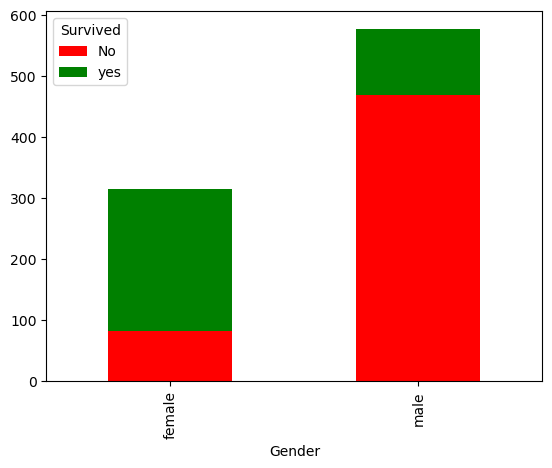

In [ ]:
# plot 1 : survived by gender

survival_gender_pd = titanic_clean_pd.groupby(['Gender','Survived']).size().unstack(fill_value=0)
survival_gender_pd.plot(kind='bar',stacked=True, color=['red','green'])

<Axes: xlabel='Pclass'>

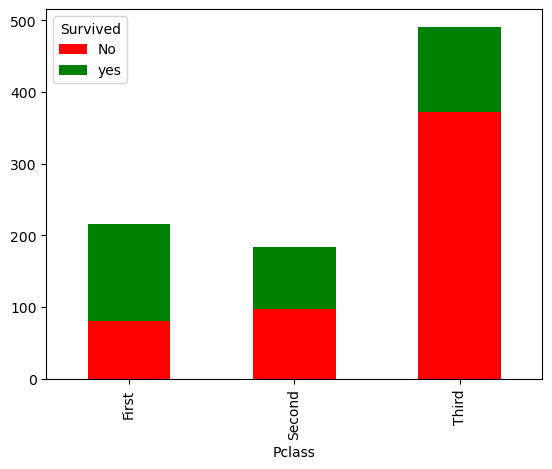

In [ ]:
# plot 2 : survived by class

survival_gender_pd = titanic_clean_pd.groupby(['Pclass','Survived']).size().unstack(fill_value=0)
survival_gender_pd.plot(kind='bar',stacked=True, color=['red','green'])

In [ ]:
# age ra fare ko correlation
age_fare_pd = titanic_clean_pd[['Age','Fare']].dropna()
age_fare_pd


,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
885,39.0,29.1250
886,27.0,13.0000
887,19.0,30.0000
889,26.0,30.0000


In [ ]:
correlation = np.corrcoef(age_fare_pd['Age'],age_fare_pd['Fare'])
correlation[0,1]

np.float64(0.0960666917690389)